#  Multilayer artificial neuron classification

<p style='text-align: justify;'> 
In this section we will study the concepts behind the classification problem in a multilayer artificial neuron using backpropagation.
</p>

## Objectives

* **Understand** how classification works in a multilayser artificial neuron,
* **Learn** how to classify images with a multilayer artificial neuron,
* **Explore** the different ways to classify images,
* **Create** classification multilayer artificial neuron with backpropagation,
* **Train** the multilayer artificial neuron using backpropagation to classify images,
* **Observe** how the multilayer artificial neuron classify the images.

## The problem: Classifying images in the multilayer artificial neuron

<p style='text-align: justify;'> 
Classifying images using an multilayer artificial neuron is extremely common across various technology fields nowadays. However, to achieve high accuracy, it is necessary to implement image classification using backpropagation algorithms in an multilayer artificial neuron.
</p>  

## The solution: Backpropagation

<p style='text-align: justify;'> 
Backpropagation is essential in multilayer artificial neurons for efficient error propagation, weight adjustment, and learning of non-linear relationships. It allows the network to iteratively update the weights based on gradients, resulting in improved performance and generalization to unseen data.
</p>  

## How backpropagation works in a neural network

<p style='text-align: justify;'>
Backpropagation is based on gradient descent, which aims to minimize the error between the predicted network output and the target output. The algorithm efficiently computes the gradient of the error function for the weights of the network, allowing for iterative adjustment of the weights to minimize the error.
</p>
<p style='text-align: justify;'>
The key idea behind backpropagation is to propagate the error from the output of the network layer back to its input layer. This process involves two main steps: forward propagation and backward propagation.
</p>
<p style='text-align: justify;'>
1. <b>Forward propagation:</b>
During forward propagation, the input data is fed into the network, and the activations of each neuron are computed layer by layer until reaching the output layer. The activations are obtained by applying an activation function (such as sigmoid or ReLU) to each neuron's weighted sum of inputs.
</p>
<p style='text-align: justify;'>
2. <b>Backpropagation:</b>
Once the output activations of a layer are computed, the error between the predicted output and the target output is calculated using an error function (e.g., mean squared error or cross-entropy). Then, the algorithm propagates this error back through the network to update the weights.
</p>

## Updating weights and bias in the neural network

<p style='text-align: justify;'>
In a neural network, the weights and biases are updated during training to optimize the network's performance. The backpropagation algorithm is commonly used to calculate the gradients of the weights and biases, which are then used to update their values. 
</p>
The main steps involved in the backward propagation are as follows:

<p style='text-align: justify;'>
1.  <b>Error calculation:</b>
    The error is calculated by taking the derivative of the error function for the output activations of the layer. This derivative represents how much each output activation contributes to the overall error.
</p>
<p style='text-align: justify;'>
2.  <b>Gradient calculation:</b>
    The derivative of the error function for the weights of each neuron is computed. This is done by applying the chain rule, which allows the calculation of the result of a composite function. The gradient is calculated for each layer, starting from the output layer and moving backward. 
</p>
<p style='text-align: justify;'>
3.  <b>Weight update:</b>
    The calculated gradients are then used to update the weights of the network. The weights are adjusted in the direction that minimizes the error based on the computed gradients and a learning rate parameter. The learning rate determines the step size taken during weight updates. 
</p>
<p style='text-align: justify;'>
4.  <b>Repeat:</b>
    Step 2 is repeated for multiple iterations until a stopping criterion is met.
</p>
<p style='text-align: justify;'>
The backpropagation algorithm enables the network to learn the appropriate weights for making accurate predictions by iteratively adjusting the weights through forward and backward propagation. Updating the weights based on error gradients allows the network to improve its performance gradually.
</p>

## ☆ Challenge: Image classification ☆

In this exercise, you will train an multilayer artificial neuron to sort handwritten number images. The dataset used is [_MNIST_](https://en.wikipedia.org/wiki/MNIST_database), which consists of grayscale images of handwritten digits of $28 \times 28$ pixels each. Your goal is to train an multilayer artificial neuron to sort these numbers correctly.

<div style="text-align:center">
<img src="./images/figure11_MNIST.png" style="width: 600px;">
</div>

### ⊗ Import Python packages 

Let is start by importing all the modules we will need:

In [1]:
import torch                       # for general PyTorch functionality
import torch.nn as nn              # for functional for neural network based functions
import torch.nn.functional as F    # for functional for neural network based functions
import torch.optim as optim        # for our optimizer which will update the parameters of our neural network
import torch.utils.data as data    # for handling the dataset

import torchvision.transforms as transforms # for data augmentation
import torchvision.datasets as datasets     # for loading the dataset

from sklearn import metrics                 # for visualizing a confusion matrix
from sklearn import decomposition           # for visualizing the neural network's representations in two dimensions
from sklearn import manifold                # for visualizing the neural network's representations in two dimensions  
from tqdm.notebook import trange, tqdm
import matplotlib.pyplot as plt             # for plotting

import numpy as np
import copy
import random
import time

The main ones we need to import are:

- The **torch** module is part of [_PyTorch_](https://pytorch.org), a popular machine learning library in Python.

- The **torchvision** is a package that provides access to popular datasets, model architectures, and image transformations for computer vision. It is generally used alongside PyTorch.

- The **sklearn** module is part of the [_Scikit-learn_](https://scikit-learn.org/stable/) package that is a powerful and widely used library in Python for machine learning. It provides a range of supervised and unsupervised learning algorithms in Python.


To ensure we get reproducible results, we set the random seed for Python, NumPy and PyTorch.

In [2]:
SEED = 12345

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

### ⊗ Load the dataset

The first thing we will do is load our dataset. This will automatically download the training set for the [_MNIST dataset_](https://en.wikipedia.org/wiki/MNIST_database).  This is a dataset of 28x28-pixel black-and-white images consisting of handwritten digits, $0$ to $9$.  We will save it in a folder called `datasets`. It will create the folder if it does not exist.

<div style="text-align:center">
<img src="./images/figure12_MLP_MNIST.png" style="width: 500px;">
</div>

In [3]:
ROOT = './datasets'

train_data = datasets.MNIST(root=ROOT,
                            train=True,
                            download=True)

### ⊗ Normalize the dataset

<p style='text-align: justify;'>
Next, we want to normalize our data. This means we want it to have a mean of zero and a standard deviation of one.  We normalize our data by subtracting the mean and dividing by the standard deviation of our dataset. First, we need to calculate the mean and standard deviation.  To calculate the mean and standard deviation, we get the actual data (the images) using the `datasets.` attribute of our training data, convert them into floating point numbers, and then use the built-in `mean` and `std` functions to calculate the mean and standard deviation, respectively. The image data has values between $0 - 255$, which we want to scale between $0 - 1$, so we divide by $255$.
</p>

In [4]:
mean = train_data.data.float().mean() / 255
std = train_data.data.float().std() / 255

In [5]:
print(f'Value of calculated mean: {mean}')
print(f'Value of calculated std: {std}')

Value of calculated mean: 0.13066048920154572
Value of calculated std: 0.30810779333114624


### ⊗ Data augmentation 

<p style='text-align: justify;'> 
After calculating our mean and standard deviation, we use  <i>transforms</i> of Torchvision.  A <i>transform</i> states how our data should be augmented and processed. Data augmentation involves manipulating the available training data in a way that artificially creates more training examples. We use <i>transforms</i>.Compose to built a list of transformations that will be applied to the image. 
</p>
    
The transforms we use are:
- `RandomRotation` - randomly rotates the image between `(-x, +x)` degrees, where we have set `x = 5`. Note, the `fill=(0,)` is due to a [bug](https://github.com/pytorch/vision/issues/1759) in some versions of torchvision. 

- `RandomCrop` - this first adds `padding` around our image, 2 pixels here, to artificially make it bigger, before taking a random `28x28` square crop of the image.

- `ToTensor()` - this converts the image from a PIL image into a PyTorch tensor.

- `Normalize` - this subtracts the mean and divides by the standard deviations given. 

In [6]:
train_transforms = transforms.Compose([
                                       transforms.RandomRotation(5, fill=(0,)),
                                       transforms.RandomCrop(28, padding=2),
                                       transforms.ToTensor(),
                                       transforms.Normalize(mean=[mean], std=[std])
                                      ])

test_transforms = transforms.Compose([
                                       transforms.ToTensor(),
                                       transforms.Normalize(mean=[mean], std=[std])
                                     ])

### ⊗ Train and test data

Now we have defined our transforms we can then load the train and test data with the relevant transforms defined.

In [7]:
train_data = datasets.MNIST(root=ROOT,
                            train=True,
                            download=True,
                            transform=train_transforms)

test_data = datasets.MNIST(root=ROOT,
                           train=False,
                           download=True,
                           transform=test_transforms)

We can simply check the `len` of the datasets to see how many examples are within each.

In [8]:
print(f'Number of training examples: {len(train_data)}')
print(f'Number of testing examples: {len(test_data)}')

Number of training examples: 60000
Number of testing examples: 10000


### ⊗ Plot images

<p style='text-align: justify;'> 
We can look at some images within our dataset to see what we are working with. The function below plots a square grid of images. If you supply less than a square number of images, it will ignore the last few. We will load $25$ images, which have been processed through our transforms so that they will be randomly rotated and cropped.
</p>

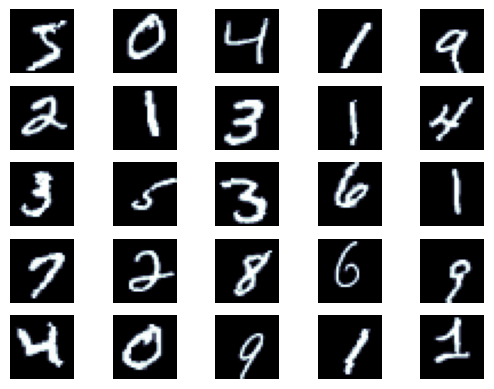

In [9]:
def plot_images(images):
    n_images = len(images)

    rows = int(np.sqrt(n_images))
    cols = int(np.sqrt(n_images))

    fig = plt.figure()
    for i in range(rows*cols):
        ax = fig.add_subplot(rows, cols, i+1)
        ax.imshow(images[i].view(28, 28).cpu().numpy(), cmap='bone')
        ax.axis('off')
        
N_IMAGES = 25

images = [image for image, label in [train_data[i] for i in range(N_IMAGES)]]

plot_images(images)    

### ⊗ Validation data

<p style='text-align: justify;'> 
The MNIST dataset comes with a training and test set, but not a validation set. We want to use a validation set to check how well our model performs on unseen data. Furthermore, we create a validation set, taking $10$% of the training set. First, we have to define the exact number of examples that we want to be in each split of the training/validation sets.
</p>    

In [10]:
VALID_RATIO = 0.9

n_train_examples = int(len(train_data) * VALID_RATIO)
n_valid_examples = len(train_data) - n_train_examples

Then, we use the `random_split` function to take a random $10$% of the training set to use as a validation set. The remaining $90$% will stay as the training set.

In [11]:
train_data, valid_data = data.random_split(train_data,
                                           [n_train_examples, n_valid_examples])

We can print out the number of examples again to check our splits are correct.

In [12]:
print(f'Number of training examples: {len(train_data)}')
print(f'Number of validation examples: {len(valid_data)}')
print(f'Number of testing examples: {len(test_data)}')

Number of training examples: 54000
Number of validation examples: 6000
Number of testing examples: 10000


<p style='text-align: justify;'> 
One thing to consider is that as the validation set has been created from the training set, it has the same transforms as the training set, with the random rotating and cropping. As we want our validation set to act as a proxy for the test set, it should also be fixed, without any random augmentation. First, let us see what $25$ of the images within the validation set look like with the training transforms:
</p>    

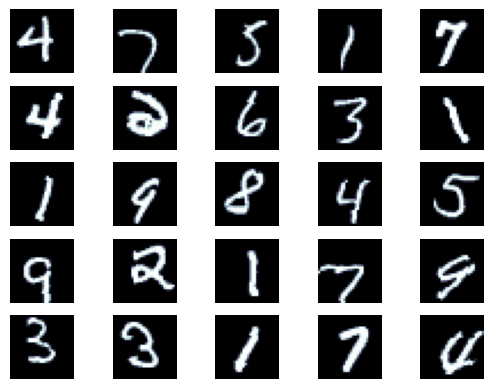

In [13]:
N_IMAGES = 25

images = [image for image, label in [valid_data[i] for i in range(N_IMAGES)]]

plot_images(images)

We can now simply replace the validation set is transform by overwriting it with our test transforms from above.
<p style='text-align: justify;'>
As the validation set is a subset of the training set, if we change the transforms of one, then by default Torchvision will change the transforms of the other. To stop this from happening, we make a `deepcopy` of the validation data.
</p>

In [14]:
valid_data = copy.deepcopy(valid_data)
valid_data.dataset.transform = test_transforms

To double check we have correctly replaced the training transforms, we can view the same set of images and notice how they are more central, and have a more standard orientation.

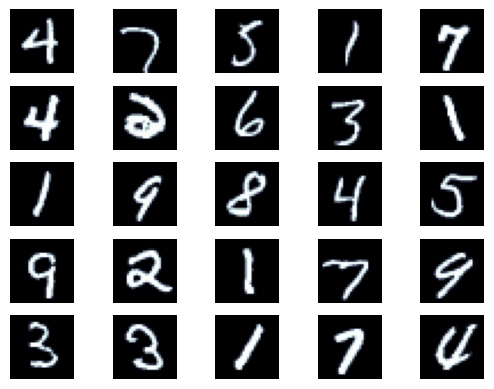

In [15]:
N_IMAGES = 25

images = [image for image, label in [valid_data[i] for i in range(N_IMAGES)]]

plot_images(images)

<p style='text-align: justify;'>
Next, we will define a `DataLoader` for each training/validation/test set. We can iterate over these, and they will yield batches of images and labels that we can use to train our model. We only need to shuffle our training set as it will be used for stochastic gradient descent, and we want each batch to be different between epochs. We are not using the validation or test sets to update our model parameters, so they do not need to be shuffled. We want to use the most considerable batch size that we can. The $64$ is relatively small and can be increased if our hardware can handle it.
</p>

In [16]:
BATCH_SIZE = 64

train_iterator = data.DataLoader(train_data,
                                 shuffle=True,
                                 batch_size=BATCH_SIZE)

valid_iterator = data.DataLoader(valid_data,
                                 batch_size=BATCH_SIZE)

test_iterator = data.DataLoader(test_data,
                                batch_size=BATCH_SIZE)

### ⊗ Defining the model

Our model will be a neural network, specifically a multilayer artificial neuron with two hidden layers. The image below shows the archicture of the model. 

<div style="text-align:center">
<img src="./images/figure12_MLP_MNIST.png" style="width: 500px;">
</div>

<p style='text-align: justify;'>
Specifically, first we will flatten our $1$x$28$x$28$ ($1$ color channel, $28$ pixels height and width) image into a $784$-element vector, also called $784$ <b>features</b>. We flatten our input, as multilayer artificial neurons cannot handle two or three-dimensional data. Next, the $784$ dimensional input is passed through the first hidden layer to transform it into $250$ dimensions. Then, another hidden layer, which will transform it to $100$ dimensions. Finally, an output layer which will transform it into a $10$-dimensional vector. The output dimension should equal the number of classes within your data. Here we have ten digits, $0 - 9$, so need our output to be $10$ dimensions.
</p>

<p style='text-align: justify;'>
The transformations between $784$ to $250$, $250$ to $100$, and $100$ to $10$ dimensions are done by linear layers. These are also known as fully-connected or affine layers. In these layers, every element in one layer is connected to every element in the next. We can think of these elements as <i>neurons</i>, as this architecture is inspired by how the human brain is made of billions of interconnected nodes, also called neurons. 
</p>

<p style='text-align: justify;'>
Each connection between a neuron in one layer and a neuron in the next has a <i>weight</i> associated with it. The input to one neuron is the sum of the weighted values of all neurons in the previous layer connected to it, plus a weighted bias term, where the bias value is always $1$. The neuron then applies an <i>activation function</i> to this weighted sum. This activation function is a non-linear function that allows the neural network to learn non-linear functions between inputs and outputs. 
</p>
<p style='text-align: justify;'>
We define our multilayer artificial neuron below, which consists of three linear layers. We first take the input batch of images and flatten them so they can be passed into the linear layers. We then pass them through the first linear layer, `input_fc`, which calculates the weighted sum of the inputs, and then apply the <i>ReLU</i> activation function elementwise. This result is then passed through another linear layer, `hidden_fc`, again applying the same activation function elementwise. Finally, we pass this through the final linear layer, `output_fc`. We return not only the output but also the second hidden layer as we will do some analysis on it later.
</p>

### ⊗ Activation function

<p style='text-align: justify;'>
The <i>ReLU</i> activation function is a popular non-linear function that is simply $max(0, x)$, where $x$ is the weighted sum of the inputs to that neuron. Other possible activation functions are hyperbolic tan (tanh) and the sigmoid function, however ReLU is the most commonly used.
</p>

<p style='text-align: justify;'>
One thing to note is that we do not use an activation function on the input directly or on the output. You should never use activation functions directly on the input, i.e., $F.relu(x)$. PyTorch combines activation functions to be applied on the output with the functions which calculate the <b>loss</b>, also known as <b>error</b> or <b>cost</b>, of a neural network. This is done for numerical stability.
</p>    

In [17]:
class multilayer_artificial_neuron(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()

        self.input_fc = nn.Linear(input_dim, 250)
        self.hidden_fc = nn.Linear(250, 100)
        self.output_fc = nn.Linear(100, output_dim)

    def forward(self, x):
        batch_size = x.shape[0]

        x = x.view(batch_size, -1)

        h_1 = F.relu(self.input_fc(x))

        h_2 = F.relu(self.hidden_fc(h_1))

        y_pred = self.output_fc(h_2)

        return y_pred, h_2

We will define our model by creating an instance of it and setting the correct input and output dimensions.

In [18]:
INPUT_DIM = 28 * 28
OUTPUT_DIM = 10

model = multilayer_artificial_neuron(INPUT_DIM, OUTPUT_DIM)

We can also create a small function to calculate the number of trainable parameters in our model in case all of our parameters are trainable.

In [19]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

<p style='text-align: justify;'>
    
- The first layer has $784$ neurons connected to $250$ neurons, so $784 \cdot 250$ weighted connections plus $250$ bias terms.
    
- The second layer has $250$ neurons connected to $100$ neurons, $250 \cdot 100$ weighted connections plus $100$ bias terms.

- The third layer has $100$ neurons connected to $10$ neurons, $100 \cdot 10$ weighted connections plus $10$ bias terms.

</p>

$$784 \cdot 250 + 250 + 250 \cdot 100 + 100 + 100 \cdot 10 + 10 = 222,360$$

In [20]:
print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 222,360 trainable parameters


### ⊗ Training the model

Next, we will define our optimizer. This is the algorithm we will use to update the parameters of our model with respect to the loss calculated on the data:

- Pass a batch of data through your model,

- Calculate the loss of your batch by comparing your predictions of model against the actual labels,

- Calculate the gradient of each of your parameters with respect to the loss,

- Update each of your parameters by subtracting their gradient multiplied by a small *learning rate* parameter.

<p style='text-align: justify;'>
We use the *Adam* algorithm with the default parameters to update our model. Improved results could be obtained by searching over different optimizers and learning rates, however default Adam is usually a good starting point.
</p>

In [21]:
optimizer = optim.Adam(model.parameters())

<p style='text-align: justify;'>Then, we define a *criterion*, name of PyTorch for a loss/cost/error function. This function will take in your predictions of model with the actual labels and then compute the loss/cost/error of your model with its current parameters.</p>

`CrossEntropyLoss` both computes the *softmax* activation function on the supplied predictions as well as the actual loss via *negative log likelihood*. 

Briefly, the softmax function is:

$$\text{softmax }(\mathbf{x}) = \frac{e^{x_i}}{\sum_j e^{x_j}}$$ 

<p style='text-align: justify;'>This converts our $10$-dimensional output, where each element is an unbounded real number, into a probability distribution over $10$ elements. That is, all values are between $0$ and $1$, and together they all sum to $1$.</p> 

So we can use negative log likelihood for our loss function, as it expects probabilities. PyTorch calculates negative log likelihood for a single example via:

$$\text{negative log likelihood }(\mathbf{\hat{y}}, y) = -\log \big( \text{softmax}(\mathbf{\hat{y}})[y] \big)$$

$\mathbf{\hat{y}}$ is the $\mathbb{R}^{10}$ output from our neural network, whereas $y$ is the label, an integer representing the class. The loss is the negative log of the class index of the softmax. For example:

$$\mathbf{\hat{y}} = [5,1,1,1,1,1,1,1,1,1]$$

$$\text{softmax }(\mathbf{\hat{y}}) = [0.8585, 0.0157, 0.0157, 0.0157, 0.0157, 0.0157, 0.0157, 0.0157, 0.0157, 0.0157]$$

If the label was class zero, the loss would be:

$$\text{negative log likelihood }(\mathbf{\hat{y}}, 0) = - \log(0.8585) = 0.153 \dots$$

If the label was class five, the loss would be:

$$\text{negative log likelihood }(\mathbf{\hat{y}}, 5) = - \log(0.0157) = 4.154 \dots$$

So, intuitively, as your output of model corresponding to the correct class index increases, your loss decreases.

In [22]:
criterion = nn.CrossEntropyLoss()

We then define `device`. This is used to place your model and data onto a GPU, if you have one.

In [23]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

/home/orlandomota/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:107: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


We place our model and criterion onto the device by using the `.to` method.

In [24]:
model = model.to(device)
criterion = criterion.to(device)

<p style='text-align: justify;'>Next, we will define a function to calculate the accuracy of our model. This takes the index of the highest value for your prediction and compares it against the actual class label. We then divide how many our model got correct by the amount in the batch to calculate accuracy across the batch.</p>

In [25]:
def calculate_accuracy(y_pred, y):
    top_pred = y_pred.argmax(1, keepdim=True)
    correct = top_pred.eq(y.view_as(top_pred)).sum()
    acc = correct.float() / y.shape[0]
    return acc

We finally define our training loop. This will:

- Put our model into `train` mode,
- Iterate over our dataloader, returning batches of (image, label),
- Place the batch onto our GPU, if we have one,
- Clear the gradients calculated from the last batch,
- Pass our batch of images, `x`, through the model to get predictions, `y_pred`,
- Calculate the loss between our predictions and the actual labels,
- Calculate the accuracy between our predictions and the actual labels,
- Calculate the gradients of each parameter,
- Update the parameters by taking an optimizer step,
- Update our metrics.

<p style='text-align: justify;'>Some layers act differently when training and evaluating the model that contains them, hence why we must tell our model we are in training mode. The model we are using here does not use any of those layers, however it is good practice to get used to putting your model in training mode.</p>

In [26]:
def train(model, iterator, optimizer, criterion, device):
    epoch_loss = 0
    epoch_acc = 0

    model.train()

    for (x, y) in tqdm(iterator, desc="Training", leave=False):
        x = x.to(device)
        y = y.to(device)

        optimizer.zero_grad()

        y_pred, _ = model(x)

        loss = criterion(y_pred, y)

        acc = calculate_accuracy(y_pred, y)

        loss.backward()

        optimizer.step()

        epoch_loss += loss.item()
        epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

The evaluation loop is similar to the training loop. The differences are:
- Put our model into evaluation mode with `model.eval()`,
- Wrap the iterations inside a `with torch.no_grad()`,
- Do not zero gradients as we are not calculating any,
- Do not calculate gradients as we are not updating parameters,
- Do not take an optimizer step as we are not calculating gradients.

`torch.no_grad()` ensures that gradients are not calculated for whatever is inside the `with` block. As our model will not have to calculate gradients, it will be faster and use less memory. 

In [27]:
def evaluate(model, iterator, criterion, device):
    epoch_loss = 0
    epoch_acc = 0

    model.eval()

    with torch.no_grad():

        for (x, y) in tqdm(iterator, desc="Evaluating", leave=False):
            x = x.to(device)
            y = y.to(device)

            y_pred, _ = model(x)

            loss = criterion(y_pred, y)

            acc = calculate_accuracy(y_pred, y)

            epoch_loss += loss.item()
            epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

The final step before training is to define a small function to tell us how long an epoch took.

In [28]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

We are finally ready to train!
<p style='text-align: justify;'>
During each epoch we calculate the training loss and accuracy, followed by the validation loss and accuracy. We then check if the validation loss achieved is the best validation loss we have seen. If so, we save our parameters of model (called a `state_dict`).</p>

In [29]:
EPOCHS = 10

best_valid_loss = float('inf')

for epoch in range(EPOCHS):
    start_time = time.monotonic()

    train_loss, train_acc = train(model, train_iterator, optimizer, criterion, device)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion, device)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), './models/handwritten-model.pt')

    end_time = time.monotonic()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 01 | Epoch Time: 0m 11s
	Train Loss: 0.401 | Train Acc: 87.53%
	 Val. Loss: 0.141 |  Val. Acc: 95.70%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 02 | Epoch Time: 0m 11s
	Train Loss: 0.171 | Train Acc: 94.75%
	 Val. Loss: 0.127 |  Val. Acc: 96.21%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 03 | Epoch Time: 0m 11s
	Train Loss: 0.134 | Train Acc: 95.78%
	 Val. Loss: 0.094 |  Val. Acc: 97.21%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 04 | Epoch Time: 0m 11s
	Train Loss: 0.121 | Train Acc: 96.20%
	 Val. Loss: 0.077 |  Val. Acc: 97.57%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 05 | Epoch Time: 0m 11s
	Train Loss: 0.109 | Train Acc: 96.67%
	 Val. Loss: 0.088 |  Val. Acc: 97.19%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 06 | Epoch Time: 0m 11s
	Train Loss: 0.099 | Train Acc: 96.92%
	 Val. Loss: 0.069 |  Val. Acc: 97.92%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 07 | Epoch Time: 0m 11s
	Train Loss: 0.091 | Train Acc: 97.14%
	 Val. Loss: 0.064 |  Val. Acc: 98.09%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 08 | Epoch Time: 0m 11s
	Train Loss: 0.086 | Train Acc: 97.31%
	 Val. Loss: 0.062 |  Val. Acc: 98.03%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 09 | Epoch Time: 0m 11s
	Train Loss: 0.081 | Train Acc: 97.45%
	 Val. Loss: 0.060 |  Val. Acc: 98.20%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 10 | Epoch Time: 0m 11s
	Train Loss: 0.077 | Train Acc: 97.54%
	 Val. Loss: 0.073 |  Val. Acc: 97.89%


Afterwards, we load the parameters of the model that achieved the best validation loss and then use this to evaluate our model on the test set.

In [30]:
model.load_state_dict(torch.load('./models/handwritten-model.pt'))

test_loss, test_acc = evaluate(model, test_iterator, criterion, device)

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Our model achieves $98$% accuracy on the test set.

This can be improved by tweaking hyperparameters, e.g., number of layers, number of neurons per layer, optimization algorithm used, learning rate, etc. 

In [31]:
print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

Test Loss: 0.057 | Test Acc: 98.10%


### ⊗ Examining the model

<p style='text-align: justify;'>Now that we have trained our model, there are a few things we can look at. Most of these are simple exploratory analyses, but they can offer some insights into your model. An important thing to do is check what examples your model gets wrong and ensure that they are reasonable mistakes.</p>

<p style='text-align: justify;'>The function below will return the predictions of model over a given dataset. It will return the inputs (image), the outputs (model predictions), and the ground truth labels.</p>

In [32]:
def get_predictions(model, iterator, device):
    model.eval()

    images = []
    labels = []
    probs = []

    with torch.no_grad():

        for (x, y) in iterator:

            x = x.to(device)

            y_pred, _ = model(x)

            y_prob = F.softmax(y_pred, dim=-1)

            images.append(x.cpu())
            labels.append(y.cpu())
            probs.append(y_prob.cpu())

    images = torch.cat(images, dim=0)
    labels = torch.cat(labels, dim=0)
    probs = torch.cat(probs, dim=0)

    return images, labels, probs

We can then get these predictions and, by taking the index of the highest predicted probability, get the predicted labels.

In [33]:
images, labels, probs = get_predictions(model, test_iterator, device)

pred_labels = torch.argmax(probs, 1)

Then, we can make a confusion matrix from our actual labels and our predicted labels. A [_Confusion Matrix_](https://en.wikipedia.org/wiki/Confusion_matrix) is a performance evaluation tool used in machine learning and statistics. It summarizes the predictions of a classification model by displaying the number of true positive, true negative, false positive, and false negative outcomes. It helps to assess the accuracy and effectiveness of the predictions of model.

In [34]:
def plot_confusion_matrix(labels, pred_labels):
    fig = plt.figure(figsize=(10, 10)) 
    ax = fig.add_subplot(1, 1, 1)
    cm = metrics.confusion_matrix(labels, pred_labels)
    cm = metrics.ConfusionMatrixDisplay(cm, display_labels=range(10))
    cm.plot(values_format='d', cmap='Blues', ax=ax)

The results seem reasonable enough; the most confused predictions-actuals are: 3-5 and 2-7.

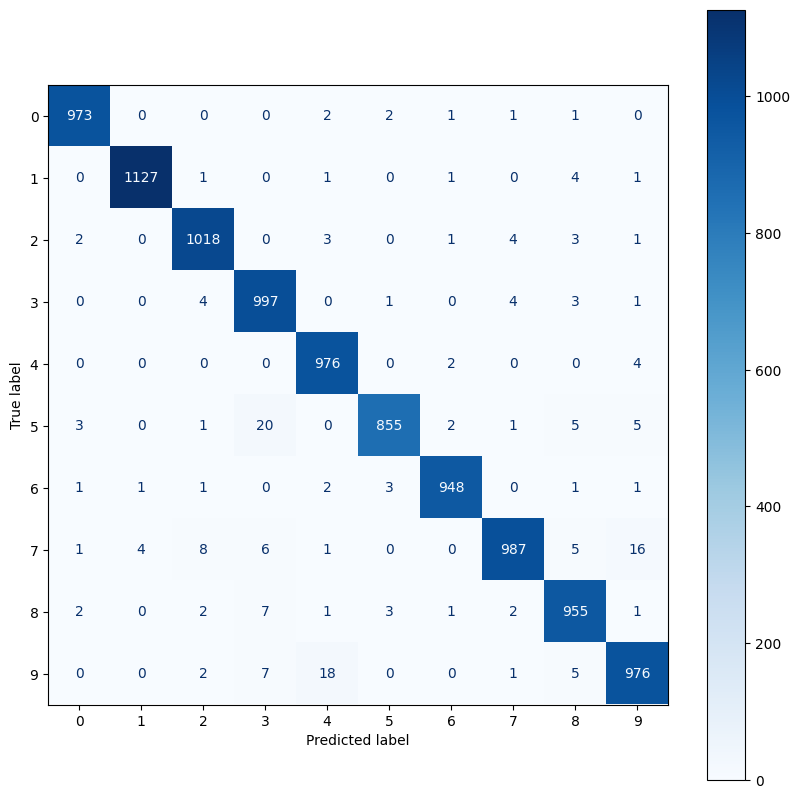

In [35]:
plot_confusion_matrix(labels, pred_labels)

Next, for each of our examples, we can check if our predicted label matches our actual label.

In [36]:
corrects = torch.eq(labels, pred_labels)

We can then loop through all of the examples over our model's predictions and store all the examples the model got incorrect into an array.

Then, we sort these incorrect examples by how confident they were, with the most confident being first.

In [37]:
incorrect_examples = []

for image, label, prob, correct in zip(images, labels, probs, corrects):
    if not correct:
        incorrect_examples.append((image, label, prob))

incorrect_examples.sort(reverse=True, key=lambda x: torch.max(x[2], dim=0).values)

We can then plot the incorrectly predicted images along with how confident they were on the actual label and how confident they were at the incorrect label.

In [38]:
def plot_most_incorrect(incorrect, n_images):
    rows = int(np.sqrt(n_images))
    cols = int(np.sqrt(n_images))

    fig = plt.figure(figsize=(20, 10))
    for i in range(rows*cols):
        ax = fig.add_subplot(rows, cols, i+1)
        image, true_label, probs = incorrect[i]
        true_prob = probs[true_label]
        incorrect_prob, incorrect_label = torch.max(probs, dim=0)
        ax.imshow(image.view(28, 28).cpu().numpy(), cmap='bone')
        ax.set_title(f'true label: {true_label} ({true_prob:.3f})\n'
                     f'pred label: {incorrect_label} ({incorrect_prob:.3f})')
        ax.axis('off')
    fig.subplots_adjust(hspace=0.5)

<p style='text-align: justify;'>
Below we can see the $25$ images the model got incorrect and was most confident about. A lot of these digits are irregular, so it is difficult for the model to do well on these. The images that do look fine, if you squint you can sort of see why the model got it wrong. Each prediction provides $10$ different percentages for numbers from $0$ to $10$. Each percentage indicates the certainty that the model has that the prediction corresponds to a specific value. Therefore, the sum of the 10 percentages should result in $1$ ($100$%). Below, it is possible to observe that each prediction has the true label, which corresponds to the expected result, and the pred label, which corresponds to the prediction of model result. Each label has a percentage, which represents the certainty of model for the presented result. In other words, in the first prediction, the model resulted in $0$% chance of being the number $2$ (expected result) and $100$% chance of being the number $0$ (obtained result).
</p>    

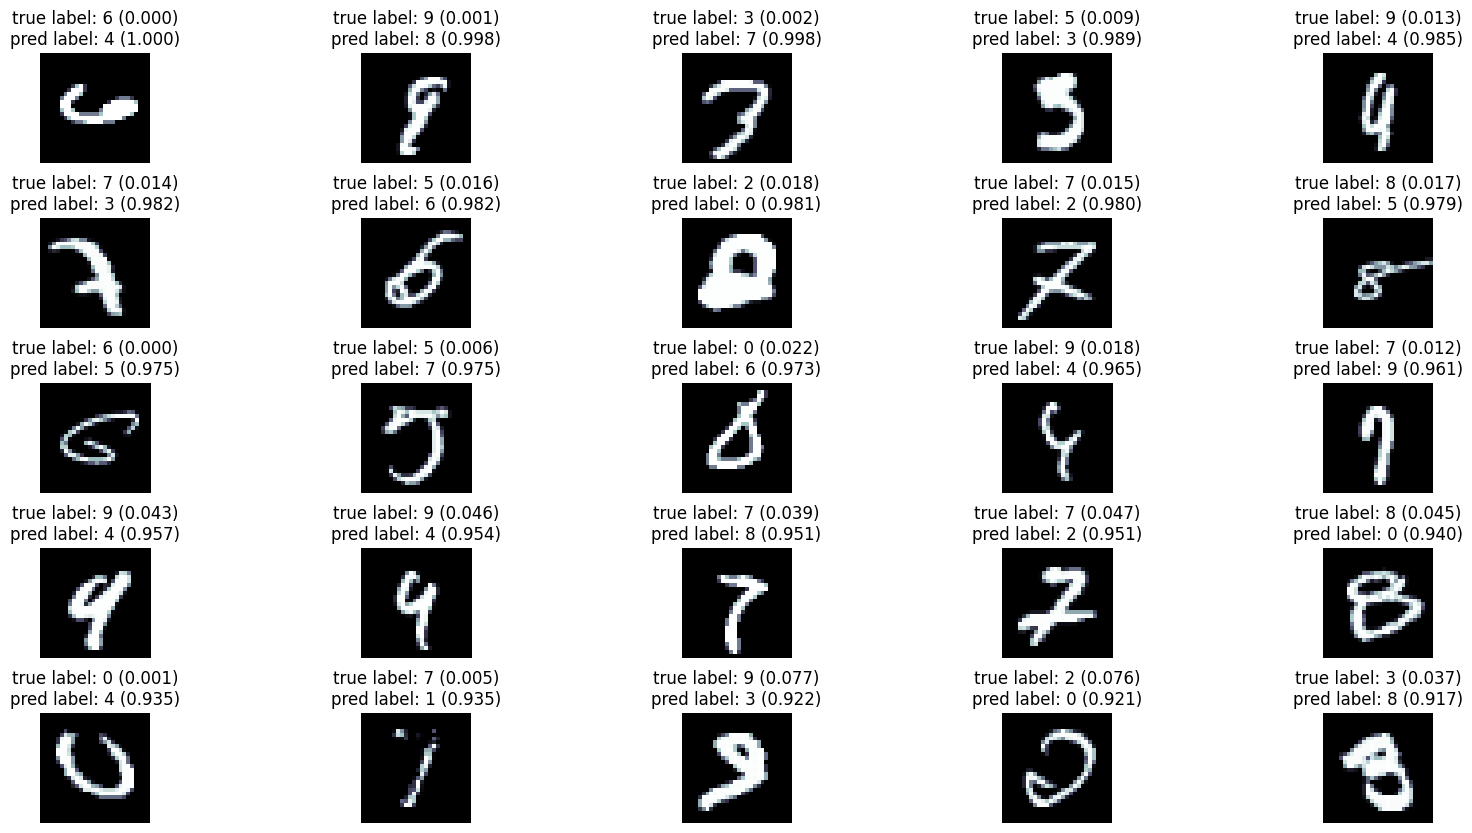

In [39]:
N_IMAGES = 25

plot_most_incorrect(incorrect_examples, N_IMAGES)

### Summary

In this notebook we have shown: 

- Loading Torchvision datasets,
- Loading transforms to augment and normalize our data,
- Defining a multilayer artificial neuron,
- Training a model to achieve > $98$% accuracy,
- Viewing our mistakes of model.

## Clear the memory

Before moving on, please execute the following cell to clear up the CPU memory. This is required to move on to the next notebook.

In [40]:
#import IPython
#app = IPython.Application.instance()
#app.kernel.do_shutdown(True)

## Next

In the next notebook you will learn how to use an multilayer artificial neuron for data regression [_03-multilayer-artificial-neuron-regression.ipynb_](03_multilayer-artificial-neuron-regression.ipynb).